# requests 다루기
: 웹사이트의 데이터를 요청/응답을 받기 위한 라이브러리

In [1]:
import requests as req

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
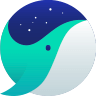
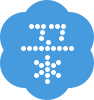

In [6]:
# 웹 사이트 요청
# 200 : 요청 성공 
naver_res = req.get('https://www.naver.com')
naver_res.text

데이터를 서버에 요청할 때 프로그램으로 요청하는 것을 서버에게 감지할 수 있음
--> 제대로 응답을 해주지 않게 됨 --> 응답결과 .[406].
<br>해결책 : header 값(user-agent)을 설정

In [7]:
# header값 생성
h = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}

# 멜론 사이트 요청
melon_res = req.get('https://www.melon.com/', headers = h)

# 응답데이터(HTML)값 접근
melon_res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 

# BeautifulSoup 라이브러리
: 응답데이터를 파이썬 객체로 변환한 후에 원하는 데이터를 추출

In [8]:
from bs4 import BeautifulSoup as bs

In [10]:
# bs(변환할 데이터, 변환방법)
# 변환 방법 : lxml > html.parser > html5lib
html = bs(naver_res.text, 'lxml')
type(html)

bs4.BeautifulSoup

In [12]:
# 데이터를 감싸고 있는 요소객체 접근
# find(요소이름)
# select_one(CSS 선택자)

# html.find('title')
html.find('title')

<title>NAVER</title>

In [13]:
# 요소객체 내 내용 접근
# html.find('title').text
html.find('title').text

'NAVER'

In [14]:
# 네이버 메뉴에서 '메일' 텍스트를 추출
html.select_one('a.nav').text

'메일'

In [26]:
# 네이버 메뉴 전체 추출
# select(CSS선택자) : 선택자에 해당하는 모든 요소를 추출 -> 리스트로 반환
navilist = html.select('ul.type_fix a.nav')

In [25]:
# 요소 내 속성값 접근 : get(속성명)
#[]보다 get()를 사용하는 이유는 비교가 가능하기 때문
# print(navilist[2].get('href1'))
print(navilist[2].get('href'))
print(navilist[2].get('href')==None)

https://section.blog.naver.com/
False


In [27]:
# 전체 길이 확인
len(navilist)

8

In [28]:
for i in range(len(navilist)):
    print(navilist[i].text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


# 뉴스 페이지 데이터 추출(제목/내용)

In [29]:
news_url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=102&oid=025&aid=0003180571'
news_url

'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=102&oid=025&aid=0003180571'

In [34]:
news_html = req.get(news_url, headers=h)
news_html.text

'<!DOCTYPE HTML> \r\n<html lang="ko"> \r\n<head>\r\n<meta charset="euc-kr">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="referrer" contents="always">\r\n<meta name="viewport" content="width=1106" />\r\n<title>코로나 사망자 급증에 화장장도 만원…“공설 화장장 운영 확대” : 네이버 뉴스</title>\r\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\n\t\n\t\t\n\t\t\n\t\t\n\t\n\n<meta property="me2:post_tag"\t\tcontent="중앙일보 : 네이버뉴스"/>\n<meta property="me2:category1"\t\tcontent="중앙일보"/>\n<meta property="me2:category2"\t\tcontent="사회"/>\n<meta property="me2:image"\t\t\tcontent="https://imgnews.pstatic.net/image/025/2022/03/16/0003180571_001_20220316134201130.jpg"/>\n\n<meta property="og:title"\t\t\tcontent="코로나 사망자 급증에 화장장도 만원…“공설 화장장 운영 확대”"/>\n<meta property="og:type"\t\t\tcontent="article"/>\n<meta property="og:url"\t\t\t\tcontent="https://news.naver.com/main/read.naver?mode=LSD&mid=sec&oid=025&aid=0003180571&sid1=001"/>\n<meta property="og:image"\t\t\tcontent="https://imgnews.pstatic.net/image/025/2022/03/16/00

In [36]:
html2 = bs(news_html.text, 'lxml')

In [37]:
html2.select_one('div.article_info>h3').text

'코로나 사망자 급증에 화장장도 만원…“공설 화장장 운영 확대”'

In [46]:
content = html2.select_one('div#articleBodyContents').text
content.replace('\n',' ')

'       신종 코로나바이러스 감염증(코로나19) 신규 확진자수가 사상 첫 40만명대를 돌파한 16일 오전 서울 송파구청에서 구청 관계자들이 일일 신규 확진자 수를 점검하고 있다. 뉴스1           신종 코로나바이러스 감염증(코로나19) 사망자 급증으로 화장 수요가 증가하며 정부와 지방자치단체가 전국 공설 화장시설의 운영 기간과 화장 횟수를 늘리기로 했다.        중앙사고수습본부(중수본)는 16일 정례브리핑에서 “보건복지부와 17개 시도는 4월 중순까지 전국 60개 공설 화장시설을 대상으로 집중운영 기간을 실시하기로 했다”고 밝혔다.      정부는 집중운영 기간 공설 화장시설의 화장로 1기당 하루 가동 횟수를 늘려 하루 1044명 수준인 화장 가능 인원을 1580명까지 늘릴 방침이다.      기존 화장로 1기당 가동 횟수를 하루 평균 3.3회에서 최소 5회 이상, 특히 수도권과 대도시는 최대 7회까지 늘리겠다고 밝혔다.      또한 이 기간에는 화장 시설별 운영시간을 2∼6시간 추가로 연장하고, 개장 유골 화장(매장한 시신이나 유골을 화장하는 것)은 보류하거나 최소화하기로 했다.      지난 1∼14일 2주간의 일평균 화장 건수는 1110건으로, 이 중 코로나19 사망으로 인한 화장은 194.1건이다. 하루에 화장되는 사망자의 약 17.5%가 코로나19 사망자인 셈이다.        실제 최근 화장 수요가 늘어 화장장에 과부하가 걸리면서 3일 이내에 화장장을 찾지 못해 3일장이 아닌 길게는 5일장, 6일장을 치르는 사례도 발생했다.      권덕철 복지부 장관은 “중앙정부와 지자체가 협업해 화장 수요 불균형에 대비하겠다”며 “당분간 일반시신 외 개장 유골 화장 시 불편함이 있더라도 양해를 부탁한다”고 밝혔다.       한편 오미크론 변이 대유행이 정점을 향하면서 16일 코로나19 신규 확진자는 40만명을 넘어섰다. 중앙방역대책본부는 이날 0시 기준으로 신규 확진자가 40만741명 늘어 누적 762만9275명으로 집계됐다고 밝혔다.   

In [48]:
melon_chart_url = 'https://www.melon.com/chart/index.htm'
melon_chart_res = req.get(melon_chart_url,headers = h)
html = bs(melon_chart_res.text, 'lxml')

In [55]:
# 멜론차트 Top100에서 노래제목만 추출
songNms = html.select('div.rank01 a')

In [52]:
len(songNms)

100

In [68]:
songNmList = []

# songNms에 있는 요소의 노래제목 데이터만 출력하시오
for i in range(len(songNms)):
#     print(songNms[i].text)
    songNmList.append(songNms[i].text)

In [70]:
rank = []
singerList = []

# 멜론차트 Top100에서 가수만 추출
singerNms = html.select('div.rank02>span')
for i in range(len(singerNms)):
#     print(singerNms[i].text)
    rank.append(i+1)
    singerList.append(singerNms[i].text)

In [75]:
len(rank), len(songNmList), len(singerList)

(100, 100, 100)

박재범
(여자)아이들
태연 (TAEYEON)
임영웅
김민석 (멜로망스)
MSG워너비(M.O.M)
멜로망스
STAYC(스테이씨)
GAYLE
케이시 (Kassy)
IVE (아이브)
YENA (최예나)
휘인 (Whee In)
GOT the beat
경서예지, 전건호
sokodomo
임영웅
이무진
폴킴
BE'O (비오)
The Kid LAROI, Justin Bieber
탑현
이무진
aespa
임영웅
아이유
BE'O (비오)
아이유
임영웅
aespa
임영웅
원슈타인
임영웅
태연 (TAEYEON)
임영웅
임영웅
방탄소년단
방탄소년단
이예준
aespa
주시크 (Joosiq)
방탄소년단
MSG워너비(M.O.M)
태연 (TAEYEON)
아이유
비투비
베이식 (Basick)
아이유
임영웅
디핵 (D-Hack), PATEKO (파테코)
아이유
마크툽 (MAKTUB)
노을
10CM
한동근
Coldplay, 방탄소년단
호미들
BE'O (비오)
방탄소년단
V
비비 (BIBI)
Ed Sheeran
헤이즈 (Heize)
성시경
아이유
경서
아이유
AKMU (악뮤)
임영웅
이승윤
폴킴
Justin Bieber
먼데이 키즈 (Monday Kiz)
AKMU (악뮤)
멜로망스
브레이브걸스
박봄 (Park Bom)
먼데이 키즈 (Monday Kiz)
적재
마크툽 (MAKTUB)
비비 (BIBI)
Kelly Clarkson
BE'O (비오)
태일 (TAEIL)
방탄소년단
정동하
오마이걸 (OH MY GIRL)
산들
송이한
에픽하이 (EPIK HIGH)
Mudd the student
개코, 아우릴고트 (OUREALGOAT), SINCE, 안병웅, Tabber, 조광일
멜로망스
기현 (몬스타엑스)
이예준
Jawsh 685, Jason Derulo, 방탄소년단
아넌딜라이트(Anandelight), unofficialboyy, BE'O (비오), 지구인, Mudd the student
김태리, 남주혁, 보나(우주소녀), 최현욱, 이주명
이예준
NMIXX


In [66]:
import pandas as pd

In [79]:
chartDic = {'순위':rank, '제목' : songNmList, '아티스트' : singerList}

In [80]:
chart_df = pd.DataFrame(chartDic)
chart_df.head(5)

,순위,제목,아티스트
0,1,GANADARA (Feat. 아이유),박재범
1,2,TOMBOY,(여자)아이들
2,3,INVU,태연 (TAEYEON)
3,4,사랑은 늘 도망가,임영웅
4,5,취중고백,김민석 (멜로망스)


In [84]:
chart_df.to_csv('melon_chart_top100.csv', index=False, encoding = "euc-kr")